In [26]:
#importing important libraries
import numpy as np
import pandas as pd

In [56]:
#reading the csv files
df = pd.read_csv('GOLD.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [57]:
#removing the pandas default indexing and making 'Data' as index.
df.set_index('Date',inplace=True)
df

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [58]:
#dropping all the rows having NaN values so that we can make a model on the given values of 'Pred' column.
df1 = df.dropna()
df1

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


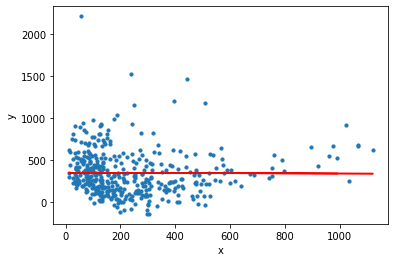

In [59]:
#training the linear regression model.
import numpy as np
import matplotlib.pyplot as plt #for plotting purposes
from sklearn.linear_model import LinearRegression #importing algorithm
from sklearn.metrics import mean_squared_error, r2_score #importing functions to know the accuracy of the model.

#converting the columns into arrays.
y = np.array(df1["Pred"])
x = np.array(df1["new"])

#since the array made above was a 1D array, hence reshape is done to convert 1D array into 2D array to avoid the Value Error.
x = x.reshape(-1,1) 
y = y.reshape(-1,1)


regression_model = LinearRegression() #instance made
regression_model.fit(x, y) #fitting/training the model
y_predicted = regression_model.predict(x) #predicting the values

rmse = mean_squared_error(y, y_predicted) #calculating errors 
r2 = r2_score(y, y_predicted) #calcualting r2 score for this specific model!

#printing all important values.
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


# plotting the regression graph
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')

In [60]:
#making a copy
data = df[:]

In [61]:
data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [62]:
#making an array of the 'new' column.
data_new = data['new']
data_new = data_new.values.reshape(-1,1)
data_new

array([[ 117.57074041],
       [ 295.43017594],
       [ 132.12371428],
       [ 101.29806419],
       [ 112.15331832],
       [ 182.42708892],
       [ 141.25513668],
       [ 120.06900986],
       [ 218.40164139],
       [ 919.37635783],
       [ 475.3890932 ],
       [ 222.89530686],
       [ 425.73848362],
       [ 194.44954767],
       [  69.28900524],
       [  39.22587413],
       [ 346.15840134],
       [ 152.28142465],
       [  63.23430962],
       [ 547.11562107],
       [  37.21262887],
       [ 598.10456764],
       [ 201.30676536],
       [ 546.56691539],
       [ 112.39406346],
       [ 125.33370177],
       [ 110.6119434 ],
       [ 132.27451388],
       [ 161.0781582 ],
       [ 280.11492257],
       [  46.40153631],
       [  37.06601399],
       [  13.06075193],
       [ 115.21287825],
       [ 128.55712425],
       [ 178.2011992 ],
       [ 238.33822912],
       [ 301.00877441],
       [ 243.49371501],
       [ 115.16780858],
       [ 175.88054968],
       [ 128.519

In [63]:
#predicting the values of 'Pred' column.
data_na = (regression_model.predict(data_new))

In [64]:
data_na

array([[342.70257957],
       [341.238649  ],
       [342.58279653],
       [342.83651718],
       [342.74716944],
       [342.16875806],
       [342.50763735],
       [342.68201674],
       [341.87265768],
       [336.10305478],
       [339.75743795],
       [341.83567109],
       [340.16610362],
       [342.06980326],
       [343.09997826],
       [343.34742275],
       [340.82111366],
       [342.41688187],
       [343.14981343],
       [339.16706918],
       [343.36399343],
       [338.74738789],
       [342.01336268],
       [339.17158548],
       [342.74518791],
       [342.63868396],
       [342.75985623],
       [342.58155532],
       [342.34447746],
       [341.36470623],
       [343.2883611 ],
       [343.36520019],
       [343.56278339],
       [342.72198673],
       [342.61215252],
       [342.20354064],
       [341.70856304],
       [341.19273251],
       [341.66612912],
       [342.72235769],
       [342.22264151],
       [342.61246287],
       [343.44506751],
       [341

In [65]:
#comverting this array above from 2D to 1D using .ravel() function.
data_na_1d = data_na.ravel()

In [66]:
data_na_1d

array([342.70257957, 341.238649  , 342.58279653, 342.83651718,
       342.74716944, 342.16875806, 342.50763735, 342.68201674,
       341.87265768, 336.10305478, 339.75743795, 341.83567109,
       340.16610362, 342.06980326, 343.09997826, 343.34742275,
       340.82111366, 342.41688187, 343.14981343, 339.16706918,
       343.36399343, 338.74738789, 342.01336268, 339.17158548,
       342.74518791, 342.63868396, 342.75985623, 342.58155532,
       342.34447746, 341.36470623, 343.2883611 , 343.36520019,
       343.56278339, 342.72198673, 342.61215252, 342.20354064,
       341.70856304, 341.19273251, 341.66612912, 342.72235769,
       342.22264151, 342.61246287, 343.44506751, 341.19557965,
       341.66777779, 343.10117646, 342.86525434, 341.4139941 ,
       341.24725293, 342.32586317, 343.34046324, 338.95527054,
       341.8560009 , 341.53362418, 342.55438557, 340.77699659,
       339.80833308, 342.5901382 , 342.60447444, 343.04160466,
       341.5315563 , 341.37021451, 342.56469595, 343.11

In [67]:
#converting this 1D array into a pandas Series
data_na_series = pd.Series(data_na_1d)
data_na_series

0      342.702580
1      341.238649
2      342.582797
3      342.836517
4      342.747169
          ...    
507    341.635810
508    343.240625
509    342.737786
510    343.272194
511    340.131646
Length: 512, dtype: float64

In [68]:
#cnverting this series into a dataframe.
pred = data_na_series.to_frame()

In [69]:
pred

,0
0,342.702580
1,341.238649
2,342.582797
3,342.836517
4,342.747169
...,...
507,341.635810
508,343.240625
509,342.737786
510,343.272194


In [70]:
#putting the values of this dataframe into the 'Pred' column of the original data.
df['Pred'] = pred.values
df

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


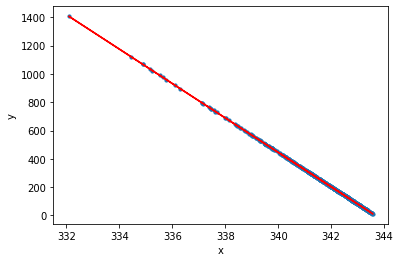

In [71]:
# training the model again, this time with complete dataset.
# repeating the exact same steps as above.
y = np.array(df["new"])
x = np.array(df["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)


regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')

# we observe here that the r2 score is 1.0 which is considered to be the best score.

(array([  1.,   0.,   6.,   4.,  10.,  15.,  39.,  83., 136., 218.]),
 array([332.08686196, 333.23605988, 334.38525781, 335.53445574,
        336.68365367, 337.83285159, 338.98204952, 340.13124745,
        341.28044537, 342.4296433 , 343.57884123]),
 <a list of 10 Patch objects>)

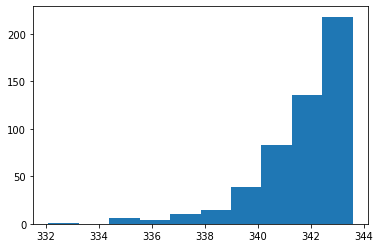

In [72]:
#plotting the histogram
plt.hist(df['Pred'])

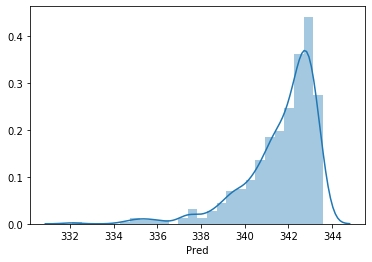

In [73]:
#plotting the displot.
import seaborn as sns
sns.distplot(df['Pred'])

In [181]:
#reading the csv file for 'Jet Airways'
jet_airways_data = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Small_Cap\JETAIRWAYS.csv')
jet_airways_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,15-May-2017,519.45,520.00,533.40,517.10,527.80,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,16-May-2017,527.50,527.00,536.50,524.65,534.00,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,17-May-2017,534.15,532.00,534.75,526.20,530.00,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,18-May-2017,528.90,525.15,538.60,517.50,517.70,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,19-May-2017,522.70,525.60,532.90,517.45,521.00,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,JETAIRWAYS,EQ,07-May-2019,133.40,129.70,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
490,JETAIRWAYS,EQ,08-May-2019,127.30,127.90,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
491,JETAIRWAYS,EQ,09-May-2019,131.35,133.50,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39
492,JETAIRWAYS,EQ,10-May-2019,147.40,150.20,157.90,145.30,146.00,151.75,152.92,22274234,3.406187e+09,193811,1431777,6.43


In [182]:
#checking for unique values in the series column
jet_airways_data['Series'].unique()

array(['EQ'], dtype=object)

In [183]:
#converting the type object of column 'Date' to datetime64ns
jet_airways_data['Date'] = pd.to_datetime(jet_airways_data['Date'])
jet_airways_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,2017-05-15,519.45,520.00,533.40,517.10,527.80,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,2017-05-16,527.50,527.00,536.50,524.65,534.00,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,2017-05-17,534.15,532.00,534.75,526.20,530.00,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,2017-05-18,528.90,525.15,538.60,517.50,517.70,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,2017-05-19,522.70,525.60,532.90,517.45,521.00,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,JETAIRWAYS,EQ,2019-05-07,133.40,129.70,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
490,JETAIRWAYS,EQ,2019-05-08,127.30,127.90,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
491,JETAIRWAYS,EQ,2019-05-09,131.35,133.50,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39
492,JETAIRWAYS,EQ,2019-05-10,147.40,150.20,157.90,145.30,146.00,151.75,152.92,22274234,3.406187e+09,193811,1431777,6.43


In [184]:
#checking for the datatypes of all the columns
jet_airways_data.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [185]:
#sorting the dataframe based on Dates so that we can split the datasets easily ahead.
jet_airways_data = jet_airways_data.sort_values('Date')
jet_airways_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,2017-05-15,519.45,520.00,533.40,517.10,527.80,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,2017-05-16,527.50,527.00,536.50,524.65,534.00,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,2017-05-17,534.15,532.00,534.75,526.20,530.00,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,2017-05-18,528.90,525.15,538.60,517.50,517.70,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,2017-05-19,522.70,525.60,532.90,517.45,521.00,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,JETAIRWAYS,EQ,2019-05-07,133.40,129.70,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
490,JETAIRWAYS,EQ,2019-05-08,127.30,127.90,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
491,JETAIRWAYS,EQ,2019-05-09,131.35,133.50,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39
492,JETAIRWAYS,EQ,2019-05-10,147.40,150.20,157.90,145.30,146.00,151.75,152.92,22274234,3.406187e+09,193811,1431777,6.43


In [186]:
#making 'Date' column as index.
jet_airways_data.set_index('Date', inplace=True)
jet_airways_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,JETAIRWAYS,EQ,519.45,520.00,533.40,517.10,527.80,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
2017-05-16,JETAIRWAYS,EQ,527.50,527.00,536.50,524.65,534.00,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2017-05-17,JETAIRWAYS,EQ,534.15,532.00,534.75,526.20,530.00,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
2017-05-18,JETAIRWAYS,EQ,528.90,525.15,538.60,517.50,517.70,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
2017-05-19,JETAIRWAYS,EQ,522.70,525.60,532.90,517.45,521.00,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,JETAIRWAYS,EQ,133.40,129.70,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
2019-05-08,JETAIRWAYS,EQ,127.30,127.90,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
2019-05-09,JETAIRWAYS,EQ,131.35,133.50,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39


In [187]:
# saving the last 90 days (3 months) data in a seperate dataframe.
ninty_jet_airways = jet_airways_data[404:]

In [188]:
ninty_jet_airways

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2018-12-31,JETAIRWAYS,EQ,276.60,281.0,283.20,275.55,278.00,277.45,279.63,5634160,1.575504e+09,48164,475032,8.43
2019-01-01,JETAIRWAYS,EQ,277.45,280.1,284.45,276.35,280.70,280.80,281.84,7699462,2.170016e+09,63338,347654,4.52
2019-01-02,JETAIRWAYS,EQ,280.80,272.0,278.35,260.50,261.45,263.55,269.30,11588833,3.120835e+09,92077,959384,8.28
2019-01-03,JETAIRWAYS,EQ,263.55,261.0,261.45,245.10,246.25,247.20,252.03,12487699,3.147269e+09,106548,916100,7.34
2019-01-04,JETAIRWAYS,EQ,247.20,242.0,250.25,236.10,244.80,245.20,242.53,18709843,4.537677e+09,135195,383410,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,JETAIRWAYS,EQ,133.40,129.7,132.90,121.00,126.00,127.30,128.62,12212871,1.570824e+09,89280,681164,5.58
2019-05-08,JETAIRWAYS,EQ,127.30,127.9,136.00,124.15,131.95,131.35,131.47,21943764,2.884869e+09,165672,833160,3.80
2019-05-09,JETAIRWAYS,EQ,131.35,133.5,149.30,131.65,147.95,147.40,142.76,34122898,4.871547e+09,223239,1497595,4.39


In [189]:
# calculating the daily return for jet airways.
return_jet_airways = ninty_jet_airways['Close Price'].pct_change()

In [190]:
return_jet_airways

Date
2018-12-31         NaN
2019-01-01    0.012074
2019-01-02   -0.061432
2019-01-03   -0.062038
2019-01-04   -0.008091
                ...   
2019-05-07   -0.045727
2019-05-08    0.031815
2019-05-09    0.122193
2019-05-10    0.029512
2019-05-13   -0.083361
Name: Close Price, Length: 90, dtype: float64

In [191]:
#reading the csv file for 'Nifty50'
nifty_data = pd.read_csv (r'C:\Users\anuditakeshri\Desktop\CL\Nifty50\Nifty50\Nifty50.csv')

In [192]:
nifty_data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


In [193]:
#repeating the same steps with nifty as done with the stocks of 'Jet Airways'
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [194]:
# saving the last 90 days (3 months) data in a seperate dataframe.
ninty_nifty = nifty_data[404:]

In [195]:
ninty_nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2018-12-31,10913.20,10923.55,10853.20,10862.55,186494657,10176.13
2019-01-01,10881.70,10923.60,10807.10,10910.10,159404542,8688.26
2019-01-02,10868.85,10895.35,10735.05,10792.50,309665939,15352.25
2019-01-03,10796.80,10814.05,10661.25,10672.25,286241745,15030.45
2019-01-04,10699.70,10741.05,10628.65,10727.35,296596655,14516.74
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [196]:
# calculating the daily return for Nifty.
return_nifty = ninty_nifty['Close'].pct_change()

In [197]:
return_nifty

Date
2018-12-31         NaN
2019-01-01    0.004377
2019-01-02   -0.010779
2019-01-03   -0.011142
2019-01-04    0.005163
                ...   
2019-05-07   -0.008652
2019-05-08   -0.012041
2019-05-09   -0.005075
2019-05-10   -0.002026
2019-05-13   -0.011588
Name: Close, Length: 90, dtype: float64

Text(0, 0.5, 'Daily Return of JET AIRWAYS and NIFTY')

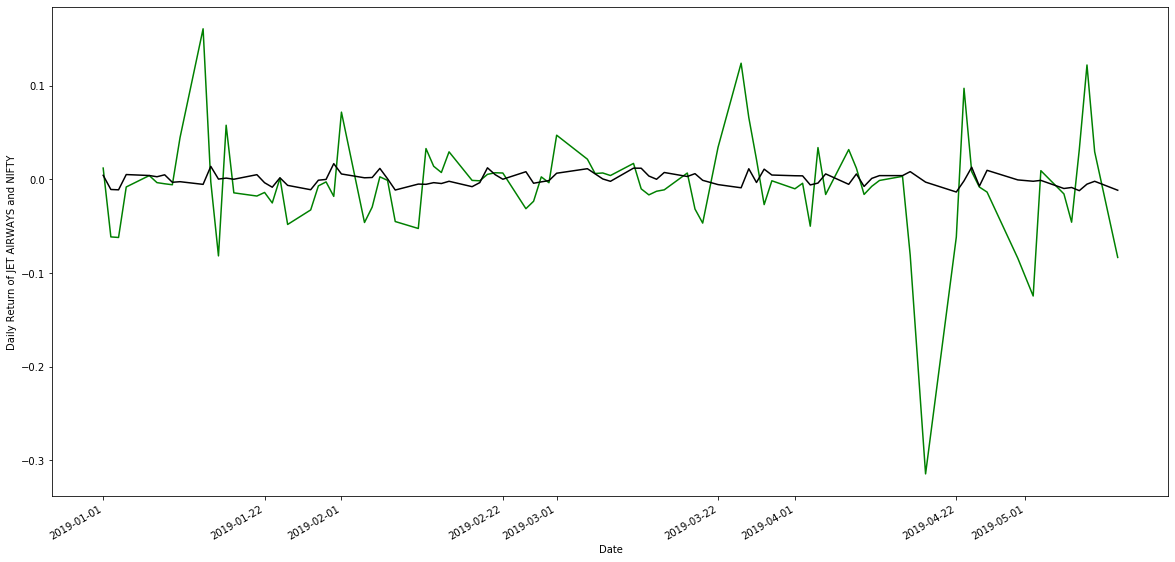

In [198]:
#plotting the comparision plot for daily returns of 'Jet Airways' and 'Nifty' for the last 90 days that is 3 months.
plt.figure(figsize=(20,10))
return_jet_airways.plot(color = 'g',label= 'Jet Airways')
return_nifty.plot(color = 'k',label= 'Nifty')
plt.ylabel("Daily Return of JET AIRWAYS and NIFTY")

In [199]:
#saving the value of daily returns of the past 3 months into the same dataframe
ninty_jet_airways['pct_change'] = ninty_jet_airways['Close Price'].pct_change()
ninty_nifty['pct_change'] = ninty_nifty['Close'].pct_change()

C:\Users\anuditakeshri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anuditakeshri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
#dropping the first value as its always NaN.
x = ninty_jet_airways['pct_change'].dropna()
y = ninty_nifty['pct_change'].dropna()

In [202]:
x

Date
2019-01-01    0.012074
2019-01-02   -0.061432
2019-01-03   -0.062038
2019-01-04   -0.008091
2019-01-07    0.004078
                ...   
2019-05-07   -0.045727
2019-05-08    0.031815
2019-05-09    0.122193
2019-05-10    0.029512
2019-05-13   -0.083361
Name: pct_change, Length: 89, dtype: float64

In [203]:
y

Date
2019-01-01    0.004377
2019-01-02   -0.010779
2019-01-03   -0.011142
2019-01-04    0.005163
2019-01-07    0.004144
                ...   
2019-05-07   -0.008652
2019-05-08   -0.012041
2019-05-09   -0.005075
2019-05-10   -0.002026
2019-05-13   -0.011588
Name: pct_change, Length: 89, dtype: float64

In [204]:
#using OLS model, calculating the daily (daily returns) beta value.
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.6497
Date:                Tue, 23 Jun 2020   Prob (F-statistic):                       0.422
Time:                        20:57:26   Log-Likelihood:                          317.28
No. Observations:                  89   AIC:                                     -632.6
Df Residuals:                      88   BIC:                                     -630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.0107      0.013      0.806      0.422      -0.016       0.037
==============================================================================
Omnibus:                        2.427   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.798
Skew:                           0.165   Prob(JB):                        0.407
Kurtosis:                       2.387   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# here we can see that the beta value for daily returns for the past 3 months is 0.0107 which is less than 1
# hence we consider it less volatile.

In [207]:
# Downloaded the Data for Jet Airways and Nifty for the time period of 'May-2018' to 'July-2019'. (1 year approx.)
#reading the respective csv files.
jet_airways = pd.read_csv('JETAIRWAYS.BO.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('^NSEI.csv', parse_dates=True, index_col='Date')

In [208]:
jet_airways

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,417.799988,422.500000,327.299988,346.700012,346.700012,7347475
2018-07-01,347.799988,359.500000,296.600006,308.700012,308.700012,9579780
2018-08-01,310.500000,333.500000,261.600006,282.200012,282.200012,21528184
2018-09-01,284.000000,288.450012,173.149994,180.449997,180.449997,9719499
2018-10-01,171.000000,243.149994,163.000000,222.300003,222.300003,19648151
2018-11-01,215.000000,357.000000,214.000000,305.799988,305.799988,43151620
2018-12-01,316.000000,316.000000,240.100006,277.649994,277.649994,24695042
2019-01-01,280.799988,312.000000,232.600006,237.399994,237.399994,35086485
2019-02-01,239.750000,281.500000,203.899994,222.800003,222.800003,18402333


In [209]:
nifty50

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,10738.450195,10893.250000,10550.900391,10714.299805,10714.299805,4683800
2018-07-01,10732.349609,11366.000000,10604.650391,11356.500000,11356.500000,4648500
2018-08-01,11359.799805,11760.200195,11234.950195,11680.500000,11680.500000,4923000
2018-09-01,11751.799805,11751.799805,10850.299805,10930.450195,10930.450195,5151800
2018-10-01,10930.900391,11035.650391,10004.549805,10386.599609,10386.599609,7030800
2018-11-01,10441.700195,10922.450195,10341.900391,10876.750000,10876.750000,5318400
2018-12-01,10930.700195,10985.150391,10333.849609,10862.549805,10862.549805,6533100
2019-01-01,10868.849609,10987.450195,10583.650391,10830.950195,10830.950195,7273800
2019-02-01,10851.349609,11118.099609,10585.650391,10792.500000,10792.500000,7461400


In [210]:
# for monthly prices, we are combining the closing prices of the two files in a seperate dataframe.
monthly_prices = pd.concat([jet_airways['Close'], nifty50['Close']], axis=1)
monthly_prices.columns = ['JET AIRWAYS', 'NIFTY50']

In [211]:
# new dataframe named 'monthly prices'
monthly_prices

,JET AIRWAYS,NIFTY50
Date,,
2018-06-01,346.700012,10714.299805
2018-07-01,308.700012,11356.500000
2018-08-01,282.200012,11680.500000
2018-09-01,180.449997,10930.450195
2018-10-01,222.300003,10386.599609
2018-11-01,305.799988,10876.750000
2018-12-01,277.649994,10862.549805
2019-01-01,237.399994,10830.950195
2019-02-01,222.800003,10792.500000


In [212]:
#calculating the monthly returns.
monthly_returns = monthly_prices.pct_change()

In [213]:
monthly_returns

,JET AIRWAYS,NIFTY50
Date,,
2018-06-01,NaN,NaN
2018-07-01,-0.109605,0.059939
2018-08-01,-0.085844,0.028530
2018-09-01,-0.360560,-0.064214
2018-10-01,0.231920,-0.049756
2018-11-01,0.375618,0.047191
2018-12-01,-0.092054,-0.001306
2019-01-01,-0.144967,-0.002909
2019-02-01,-0.061500,-0.003550


In [214]:
# dropping the NaN values which is usually the first value.
clean_monthly_returns = monthly_returns.dropna(axis=0)

In [215]:
clean_monthly_returns

,JET AIRWAYS,NIFTY50
Date,,
2018-07-01,-0.109605,0.059939
2018-08-01,-0.085844,0.028530
2018-09-01,-0.360560,-0.064214
2018-10-01,0.231920,-0.049756
2018-11-01,0.375618,0.047191
2018-12-01,-0.092054,-0.001306
2019-01-01,-0.144967,-0.002909
2019-02-01,-0.061500,-0.003550
2019-03-01,0.208932,0.077035


In [216]:
# converting the respective columns into pandas series for working with the model.
X = clean_monthly_returns['JET AIRWAYS']
y = clean_monthly_returns['NIFTY50']

In [217]:
X1 = sm.add_constant(X)

In [218]:
model = sm.OLS(y, X1)

In [219]:
results = model.fit()
results.summary()

C:\Users\anuditakeshri\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NIFTY50   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.460
Date:                Tue, 23 Jun 2020   Prob (F-statistic):             0.0898
Time:                        20:58:21   Log-Likelihood:                 24.606
No. Observations:                  13   AIC:                            -45.21
Df Residuals:                      11   BIC:                            -44.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0127      0.012      1.059      0.312      -0.014       0.039
JET AIRWAYS     0.0750      0.040      1.860      0.090      -0.014       0.164
==============================================================================
Omnibus:                        1.304   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                0.648
Skew:                          -0.537   Prob(JB):                        0.723
Kurtosis:                       2.793   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# here we can see that the beta value for daily returns for the past 3 months is 0.0750 which is less than 1
# hence we consider it less volatile.